In [2]:
import pandas as pd 

df = pd.DataFrame({'날짜': [
									   '2021-01-10 07:10:00',
									   '2021-02-15 08:20:30', 
									   '2021-03-20 09:30:00', 
									   '2021-04-25 10:40:30', 
									   '2021-05-27 11:50:00', 
									   '2021-06-21 12:00:30', 
									   '2021-07-01 13:10:00', 
									   '2021-08-16 14:50:30'
									   ]
								})
df.info()
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      8 non-null      object
dtypes: object(1)
memory usage: 196.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      8 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 196.0 bytes


In [3]:
df['날짜_date'] = df['날짜'].dt.date  # YYYY-MM-DD(문자) 
df['날짜_year'] = df['날짜'].dt.year  # 연(4자리숫자) 
df['날짜_month'] = df['날짜'].dt.month # 월(숫자) 
df['날짜_month_name'] = df['날짜'].dt.month_name() # 월(문자) 
df['날짜_day'] = df['날짜'].dt.day # 일(숫자) 
df['날짜_time'] = df['날짜'].dt.time # HH:MM:SS(문자) 
df['날짜_hour'] = df['날짜'].dt.hour # 시(숫자) 
df['날짜_minute'] = df['날짜'].dt.minute # 분(숫자) 
df['날짜_second'] = df['날짜'].dt.second # 초(숫자)


In [4]:
df.head()

,날짜,날짜_date,날짜_year,날짜_month,날짜_month_name,날짜_day,날짜_time,날짜_hour,날짜_minute,날짜_second
0,2021-01-10 07:10:00,2021-01-10,2021,1,January,10,07:10:00,7,10,0
1,2021-02-15 08:20:30,2021-02-15,2021,2,February,15,08:20:30,8,20,30
2,2021-03-20 09:30:00,2021-03-20,2021,3,March,20,09:30:00,9,30,0
3,2021-04-25 10:40:30,2021-04-25,2021,4,April,25,10:40:30,10,40,30
4,2021-05-27 11:50:00,2021-05-27,2021,5,May,27,11:50:00,11,50,0


In [8]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from datetime import datetime

datetxt = ['11/10/2024', '11/11/2024', '11/12/2024', '11/13/2024', '11/14/2024']
dates = pd.to_datetime(datetxt)
tsdata = Series([1, np.nan, np.nan, 10, 15], index=dates)

print(tsdata.head())
print(tsdata.info())

2024-11-10     1.0
2024-11-11     NaN
2024-11-12     NaN
2024-11-13    10.0
2024-11-14    15.0
dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 5 entries, 2024-11-10 to 2024-11-14
Series name: None
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes
None


In [10]:
linear_itp = tsdata.interpolate() # 선형 보간 자동
time_itp = tsdata.interpolate(method='time') # 시간에 따른 빈도 고려 선형 보간
print(linear_itp)
print(time_itp)

2024-11-10     1.0
2024-11-11     4.0
2024-11-12     7.0
2024-11-13    10.0
2024-11-14    15.0
dtype: float64
2024-11-10     1.0
2024-11-11     4.0
2024-11-12     7.0
2024-11-13    10.0
2024-11-14    15.0
dtype: float64


In [17]:

df = DataFrame({
				'C1': [5, 6, np.nan, np.nan, np.nan, 9, 12],
				'C2': [7, 8, 10, np.nan, np.nan, 20, 25]
				})
# multi_itp = df.interpolate(method='values')

# multi_itp = df.interpolate(method='values', limit=2)
multi_itp = df.interpolate(method='values', limit=1, limit_direction='backward')
print(df)
multi_itp

     C1    C2
0   5.0   7.0
1   6.0   8.0
2   NaN  10.0
3   NaN   NaN
4   NaN   NaN
5   9.0  20.0
6  12.0  25.0


,C1,C2
0,5.00,7.000000
1,6.00,8.000000
2,NaN,10.000000
3,NaN,NaN
4,8.25,16.666667
5,9.00,20.000000
6,12.00,25.000000


In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

start_date = '2020-01-01'
end_date = '2024-11-21'

# 애플 주식의 데이터를 불러오기
aapl = yf.download('AAPL', start=start_date, end=end_date)
# 데이터 확인
aapl.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.796013,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.484360,75.797501,76.110001,74.290001,74.290001,132079200


In [20]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2020-01-02 00:00:00+00:00 to 2024-11-20 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1231 non-null   float64
 1   (Close, AAPL)      1231 non-null   float64
 2   (High, AAPL)       1231 non-null   float64
 3   (Low, AAPL)        1231 non-null   float64
 4   (Open, AAPL)       1231 non-null   float64
 5   (Volume, AAPL)     1231 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.3 KB


In [23]:

# 종가만 남기고 새로운 df에 정리
df = pd.DataFrame()
df['Close'] = aapl['Close']
# 시계열 인덱스 정리
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1231 entries, 2020-01-02 to 2024-11-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1231 non-null   float64
dtypes: float64(1)
memory usage: 19.2+ KB


In [24]:
df

,Close
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501
...,...
2024-11-14,228.220001
2024-11-15,225.000000
2024-11-18,228.020004


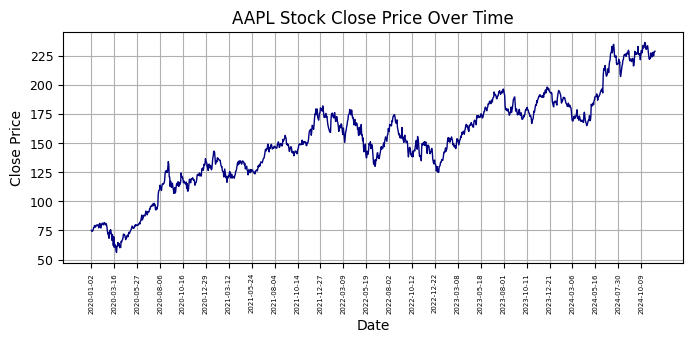

In [29]:
# 데이터 시각화
plt.figure(figsize=(8, 3))
plt.plot(df , color='navy', linewidth=1)
plt.title('AAPL Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=9)
plt.grid(True)
plt.show()

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompose = seasonal_decompose(df, model='addictive', period=365, extrapolate_trend=False)


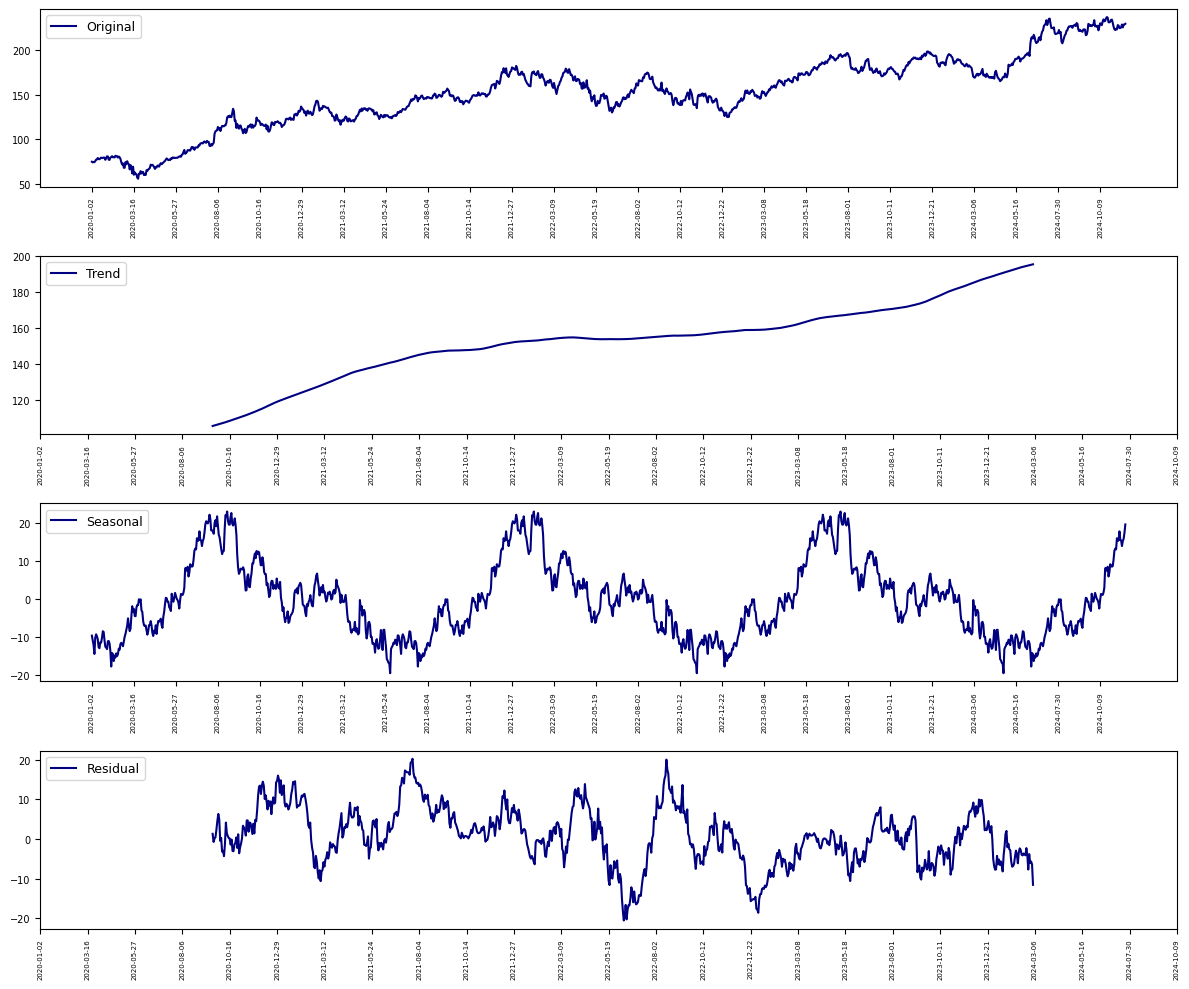

In [36]:

  # 결과 시각화
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(ts_decompose.observed, label='Original', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)
# 추세
plt.subplot(4, 1, 2)
plt.plot(ts_decompose.trend, label='Trend', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)
# 계절성 
plt.subplot(4, 1, 3)
plt.plot(ts_decompose.seasonal, label='Seasonal', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)
# 잔차
plt.subplot(4, 1, 4)
plt.plot(ts_decompose.resid, label='Residual', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1230,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()